### Pretrained ConvNet:
#### Feature extraction

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
ls

drive/  sample_data/


In [0]:
cd drive/My\ Drive

/content/drive/My Drive


In [0]:
ls

'Business Model Canvas.gdoc'  'Leftovers .gdoc'
 CITREP_Data+Code/            'Oral Presentation.gdoc'
 Classroom/                   'Quality Control.gdoc'
'Colab Notebooks'/            'Quality Control Slides.gslides'
'Getting started.pdf'         'Untitled document.gdoc'


In [0]:
cd CITREP_Data+Code/

/content/drive/My Drive/CITREP_Data+Code


In [0]:
ls

 2a-TensorFlow-Data-Loading.ipynb
 2b-TensorFlow-ML.ipynb
 3a-TF-FcNN-MNIST.ipynb
 3b-TF-FcNN-MNIST-Exercise.ipynb
 3c-FcNN-CIFAR10.ipynb
 3d-FcNN-CIFAR10-Exercise.ipynb
 3-diabetic-NeuralNet-Exercise-TF.ipynb
 3e-keras-FCNN-MNIST.ipynb
 3f-keras-FcNN-dogscats.ipynb
 3g-keras-FcNN-bloodcell-Exercise.ipynb
 3h-keras-FC-AutoEncoder.ipynb
 4a-MNIST-CNN-TF.ipynb
 4b-CIFAR10-CNN-TF-Exercise.ipynb
 5a-keras-CNN-dogscats.ipynb
 5b-keras-CNN-Bloodcell.ipynb
 5c-keras-Con-AutoEncoder.ipynb
 5d-keras-Vgg16-dogscats.ipynb
 5e-Resnet50-keras-dogscats-Exercise.ipynb
 6-Semeion-Classification-SimpleCNN-Exercise.ipynb
 7-RNN-IMDB.ipynb
 cats_and_dogs_small_1.h5
'CITREP+ - Clarence & Dr Sudipta - Deep Learning with Tensorflow and Python - v2.pdf'
 Data/
 dogscats/
 mnist/
 models/
 tensorboard.ipynb


In [0]:
# we want to use VGG16 convolution base here
# this is the input set we want to use
# downloaded from the internet
# we reduce the dimensions from 224x224 to 150x150
# we download everything but we aren't going to use everything

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))





58892288/58889256 [==============================] - 6s 0us/step




In [0]:
conv_base.summary()

#we download the convolution base


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

#### At this point, there are two ways you could proceed:
- Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, this technique won’t allow you to use data augmentation.
- Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to use data augmentation, because every input image goes through the convolutional base every time it’s seen by the model. But for the same reason, this technique is far more expensive than the first.

### Fast feature extraction using the pretrained convolutional base without data augmentation

In [0]:
base_dir = './dogscats/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150),
                                            batch_size=batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-37acb62c3ae6>", line 26, in <module>
    test_features, test_labels = extract_features(test_dir, 1000)
  File "<ipython-input-10-37acb62c3ae6>", line 15, in extract_features
    for inputs_batch, labels_batch in generator:
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py", line 104, in __next__
    return self.next(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py", line 116, in next
    return self._get_batches_of_transformed_samples(index_array)
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py", line 230, in _get_batches_of_transformed_samples
    interpolation=self.interpolation)
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing

KeyboardInterrupt: ignored

#### Dfining and training the densely connected classifier

In [0]:
model = models.Sequential()
model.add(layers.Dense(468, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dense(264, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels, epochs=10, batch_size=20,
                    validation_data=(validation_features, validation_labels))

NameError: ignored

#### Plotting the results

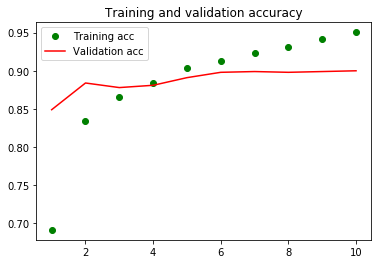

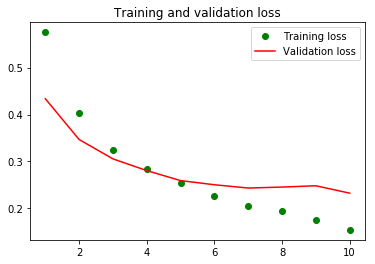

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

- Note: We reach a validation accuracy of about 90% — much better than we achieved in the previous section with the small model trained from scratch. But the plots also indicate that we’re overfitting almost from the start—despite using dropout with a fairly large rate. That’s because this technique doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets.
### Feature extraction with data augmentation

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 16,812,610
Non-trainable params: 0
_________________________________________________________________


- Note: Before compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being updated during training. If we don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.

In [0]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


#### Training the model end to end with a frozen convolutional base

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='categorical')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=2,
                              validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/2
100/100 [==============================] - 385s 4s/step - loss: 0.6265 - acc: 0.6498 - val_loss: 0.5036 - val_acc: 0.8105
Epoch 2/2
100/100 [==============================] - 378s 4s/step - loss: 0.5251 - acc: 0.7632 - val_loss: 0.4157 - val_acc: 0.8410


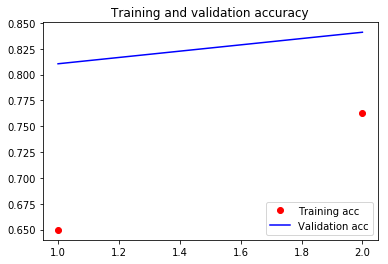

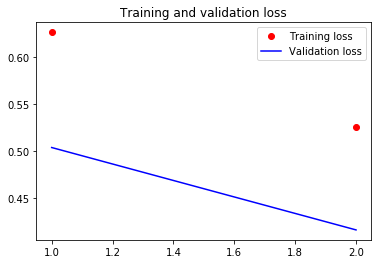

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Fine-Tuning
- Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers. This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the current problem.
Thus the
#### Steps for fine-tuning a network are as follow:
 - Add the custom network on top of an already-trained base network.
 - Freeze the base network.
 - Train the newely added part.
 - Unfreeze some layers in the base network.
 - Jointly train both these layers and the part you added.

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

#### Fine-tune the last three convolutional layers, which means all layers up to block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and block5_conv3 should be trainable.
#### Why not fine-tune more layers? Why not fine-tune the entire convolutional base?
- Earlier layers in the convolutional base encode more-generic, reusable features, whereas layers higher up encode more-specialized features. It’s more useful to fine-tune the more specialized features, because these are the ones that need to be repurposed for the new problem. There would be fast-decreasing returns in fine-tuning lower layers.
- The more parameters we’re training, more risk of overfitting. The convolutional base has 15 million parameters, so it would be risky to attempt to train it on your small dataset. It’s a good strategy to fine-tune only the top two or three layers in the convolutional base.

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=1,
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/1
100/100 [==============================] - 438s 4s/step - loss: 0.4127 - acc: 0.8108 - val_loss: 0.2601 - val_acc: 0.8980


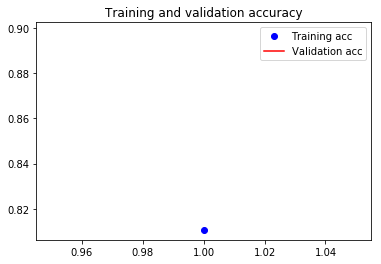

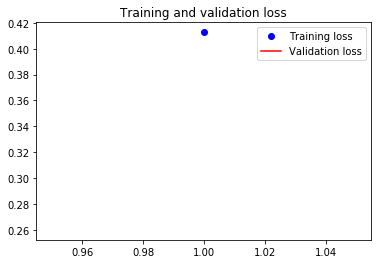

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Note:- These curves look noisy. To make them more readable, we can smooth them by replacing every loss and accuracy with exponential moving averages of these quantities. 
### Smoothing the plot

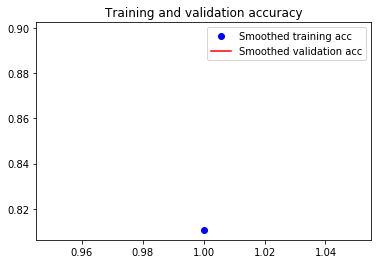

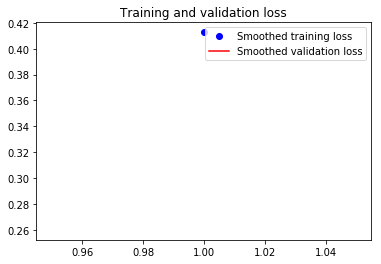

In [0]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'r', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'r', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Evaluate the model on the test data:

In [0]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8799999988079071


In [0]:
model.save('cats_and_dogs_small_Vgg16.h5')

In [0]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150), batch_size=20, class_mode='categorical')
test_x = np.zeros(shape=(1000, 150, 150, 3))
test_y = np.zeros(shape=(1000,2))
batch_size = 20
i = 0
for inputs_batch, labels_batch in test_generator:
#    print(inputs_batch.size)
    features_batch = np.reshape(inputs_batch, (20, 150, 150,3))
    test_x[i * batch_size : (i + 1) * batch_size] = features_batch
    test_y[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= 1000:
        break
        
print(test_x.shape)
print(test_y.shape)

Found 1000 images belonging to 2 classes.
(1000, 150, 150, 3)
(1000, 2)


In [0]:
y_pred = model.predict(test_x)

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
# probs = model.predict(X_val)
preds = np.argmax(y_pred, axis=1)
y_orig = np.argmax(test_y, axis=1)

cm = confusion_matrix(y_orig, preds)

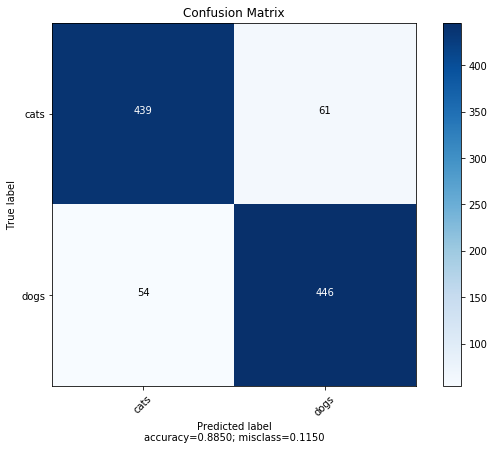

In [0]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['cats', 'dogs'],
                      title        = "Confusion Matrix")

In [0]:
import performance_matrix1
performance_matrix1.performace(cm.T, name=["dogs", "cats","Avg/Total"])

ModuleNotFoundError: No module named 'performance_matrix1'

In [0]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes=2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(1)
colors = cycle(['red','green','blue', 'orange', 'deeppink','cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 10 different classes')
plt.legend(loc="lower right")
plt.show()

In [0]:
import random
row = 2
col = 3

fig, axes = plt.subplots(row,col,figsize=(12,12))
y_value = np.array([0,1,2,3,4,5,6,7,8,9])
for i in range(0,row):
    for j in range(0,col):
        x = random.randint(0,len(test_x))
        axes[i, j].imshow(test_x[x].reshape(150,150,3))
        axes[i, j].set_title('Label: %d Pred: %d Prob: %f'
        %(y_value[np.argmax(test_y[x])],y_value[np.argmax(y_pred[x])],y_pred[x][np.argmax(y_pred[x])]))
        
plt.show()